# Gyroscope DDPG reward function testing (spinup library)

In [2]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path
from scipy.integrate import solve_ivp
import pandas as pd

import gym_gyroscope_env
import spinup
import torch
from functools import partial

from custom_functions.custom_functions import env_fn 
from custom_functions.custom_functions import create_env
from custom_functions.custom_functions import load_agent
from custom_functions.custom_functions import test_agent
from custom_functions.custom_functions import plot_test
from custom_functions.custom_functions import evaluate_control
from custom_functions.custom_functions import read_progress

import random
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

## Plot rewards

m0_005 5000
m1_005 50
m2_005 50
m3_005 50
m4_005 50
m5_005 50


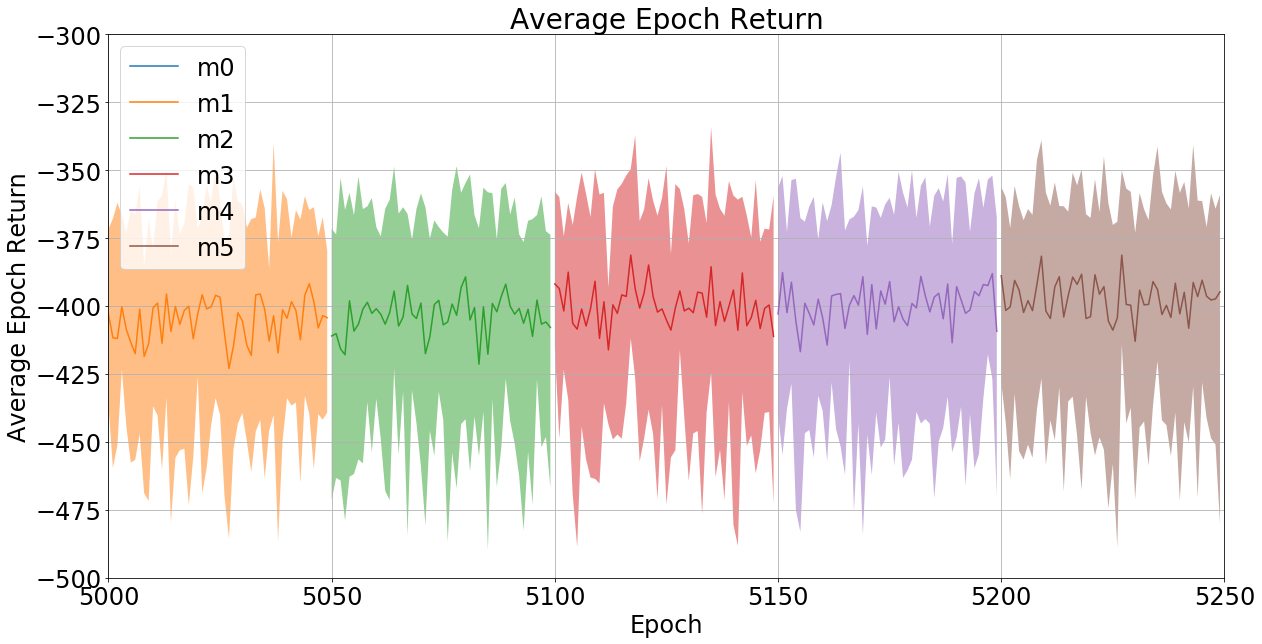

In [11]:
plt.figure(figsize=(20,10))
plt.title('Average Epoch Return',fontsize=28)
plt.xlabel('Epoch',fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('Average Epoch Return',fontsize=24)
plt.yticks(fontsize=24)
plt.grid()

agent_paths = ['m0_005','m1_005','m2_005','m3_005','m4_005','m5_005']
shift = [0,5000,5050,5100,5150,5200]

for i in range(len(agent_paths)):
    agent_path = agent_paths[i]
    progress = read_progress(agent_path)
    print(agent_path, len(progress))
    plt.plot(np.arange(progress.shape[0])+shift[i], progress[:,1])
    plt.fill_between(np.arange(progress.shape[0])+shift[i], progress[:,3], progress[:,4], alpha=0.5)
#     plt.fill_between(np.arange(progress.shape[0]), progress[:,1]+progress[:,2], progress[:,1]-progress[:,2], alpha=0.5)

plt.xlim([5000,5250])
plt.ylim([-500,-300])
plt.legend(['m0','m1','m2','m3','m4','m5'],fontsize=24)
plt.savefig('gyro_train2.png')

## Test an agent

[-1.9663807 -2.8661325  2.8920105  1.978618  -1.2486825  3.0484564
 -2.2114387]


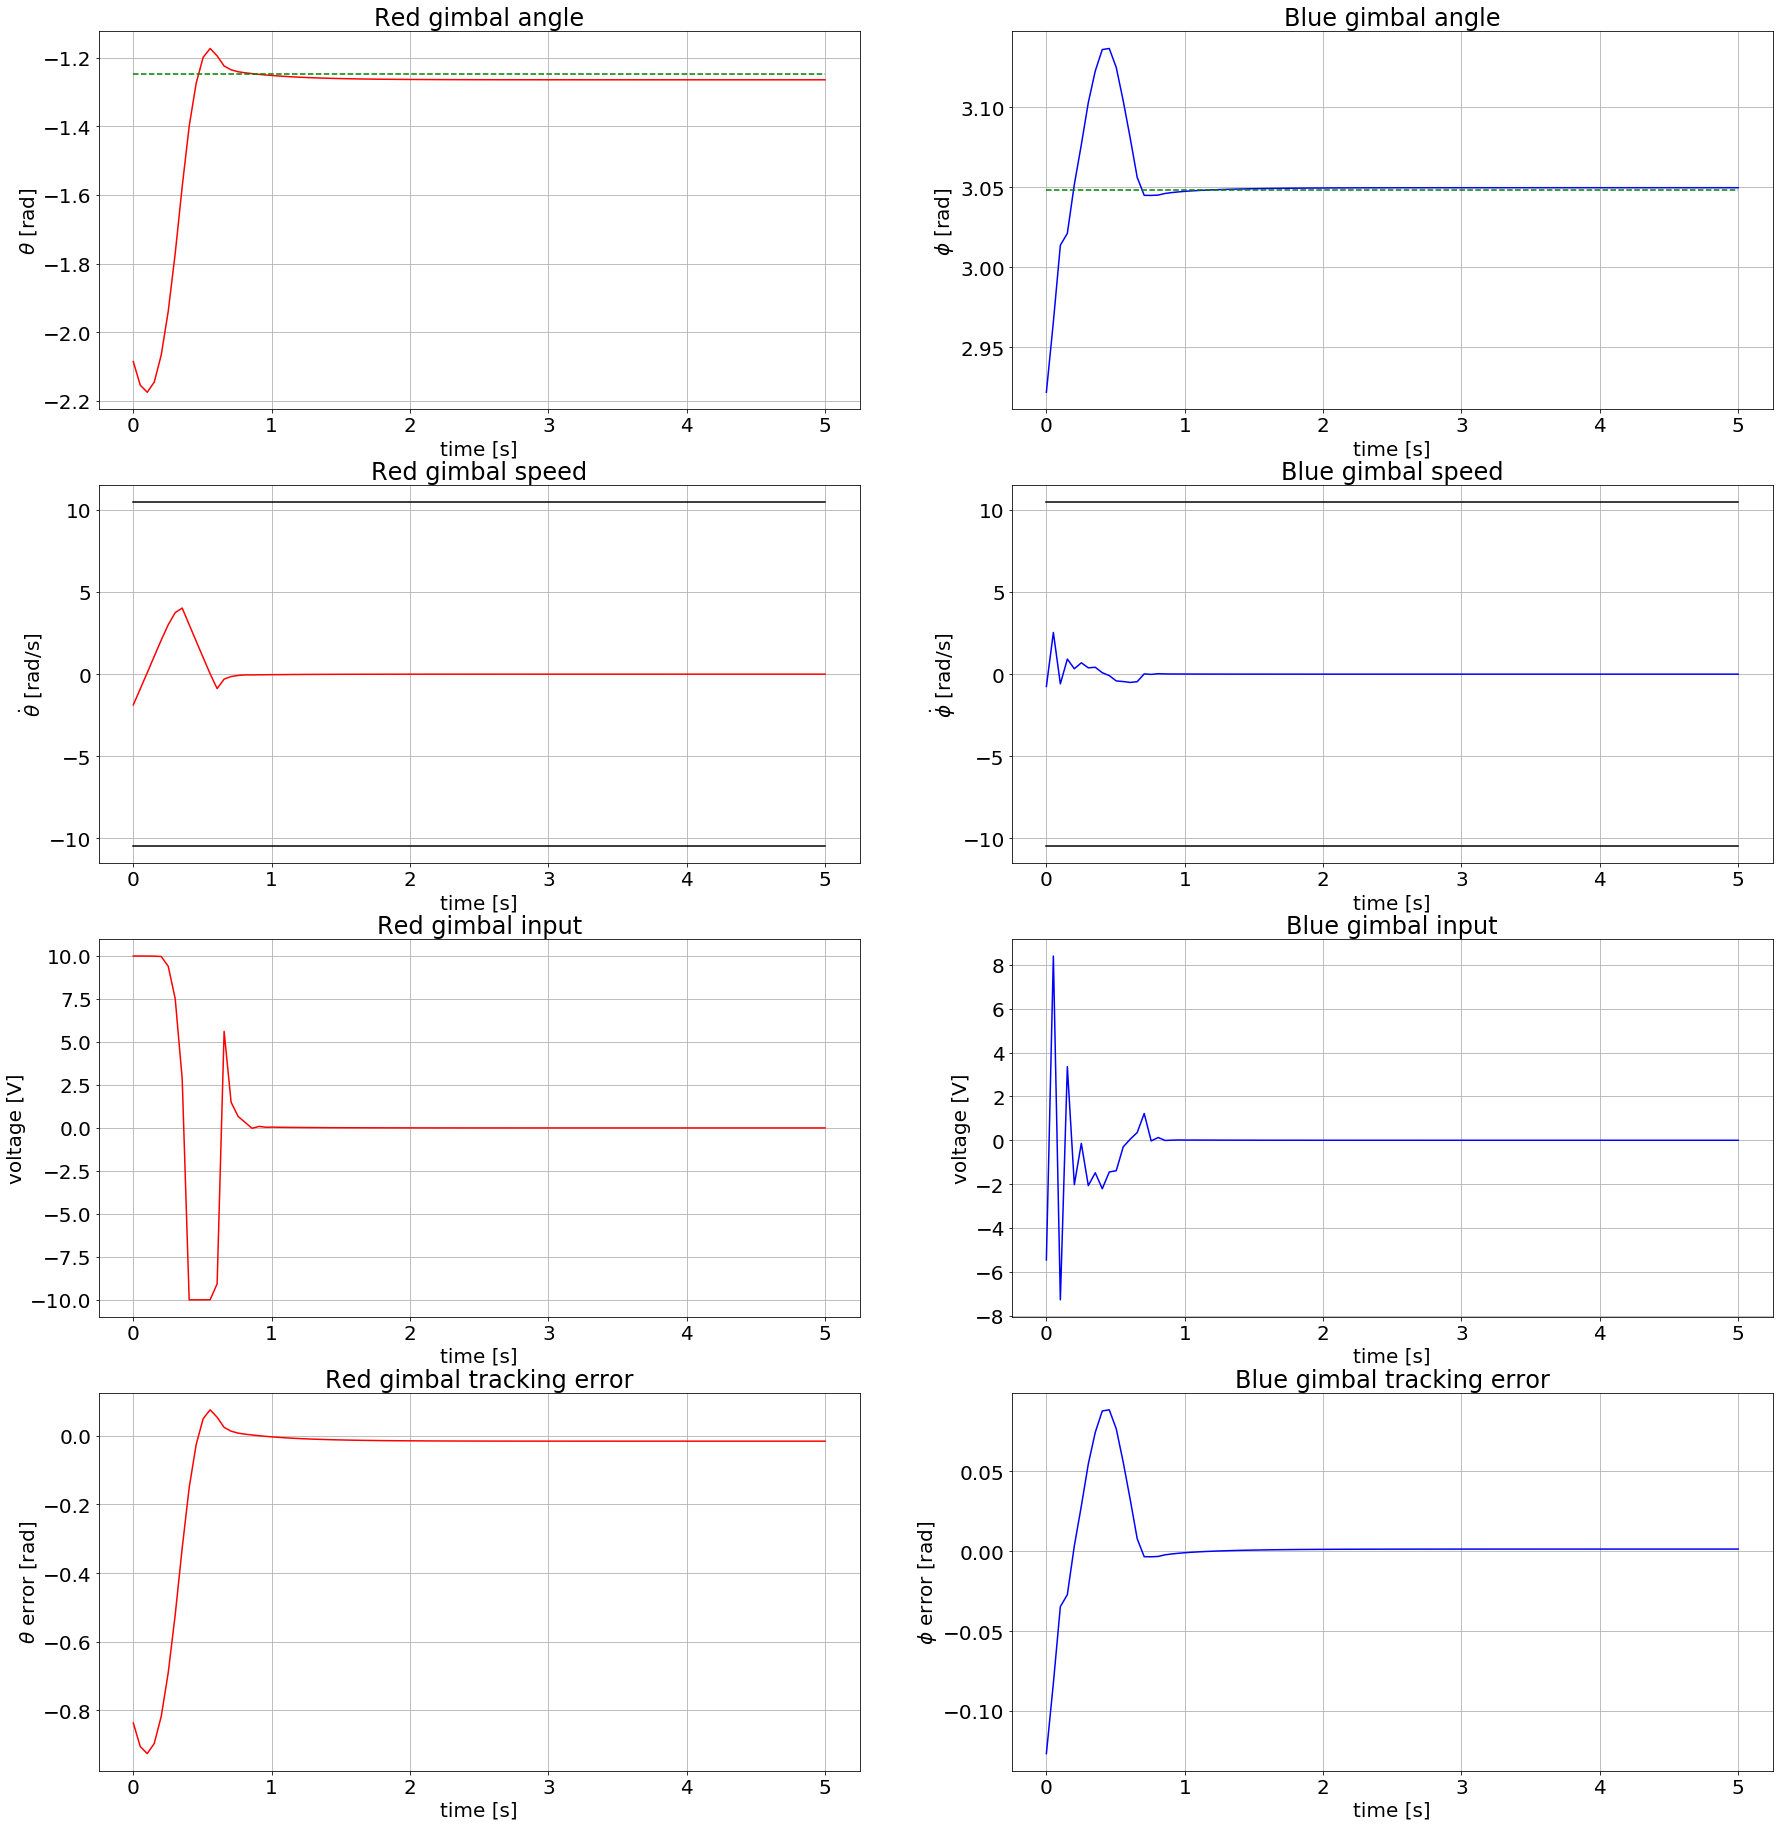

In [340]:
# Test paramaters
env_name = 'GyroscopeEnv-v1'
# Initialization args
simu_args = {
    'dt': 0.05,
    'ep_len': 100,
    'seed': 2
}
reward_func = 'PE'
reward_args = {
    'qx1': 1, 
    'qx2': 0.2, 
    'qx3': 1, 
    'qx4': 0.2, 
    'pu1': 0.1, 
    'pu2': 0.1,
    'p': 0.1,
    'e': 40
}
# init_state = np.array([0,0,0,0,45/180*np.pi,-60/180*np.pi,200/60*2*np.pi])
env = create_env(env_name,simu_args,reward_func,reward_args,state=None)
# env.reset()
print(env.state)

# agent_paths = ['iter0_base','iter0_reward01','iter0_reward02','iter0_reward03',
#               'iter0_rs01','iter0_rs02','iter0_gamma01','iter0_gamma02','iter0_gamma03',
#               'iter0_polyak01','iter0_polyak02','iter0_polyak03','iter0_lr01','iter0_lr02',
#               'iter0_bs01','iter0_bs02','iter0_ss01','iter0_ss02','iter0_noise01','iter0_noise02']

agent_paths = ['m0_005','m1_005','m2_005']

agent = load_agent(agent_paths[2])
t_end = 5

score, state_record, obs_record, action_record, reward_record = test_agent(env,agent,t_end)
plot_test(state_record, action_record, t_end, 4)